# Chapter 3: Graphical Causal Models

## Key Points Learned in this Chapter:

### 1. Graphical Causal Models: 
* DAGs represent and visualize causal relationships between variables.
### 2. d-Separation: 
* A graphical criterion to determine conditional independence in a DAG.
### 3. Markov Properties: 
* Describe how conditional independence is inferred from DAGs for probabilistic reasoning.

---

## Section 3.1. Introduction to Graphical Models

### Overview of Graphical Models

Graphical models provide a powerful framework for representing and reasoning about complex dependencies between variables. In causal inference, they help us visualize and formalize assumptions about causal relationships, using nodes to represent variables and edges to depict the causal influences between them.

The most commonly used graphical models for causal inference are **Directed Acyclic Graphs (DAGs)**. These graphs offer a structured approach to understanding the flow of causality and are particularly useful in determining the influence of interventions, highlighting pathways for potential confounding, and uncovering mediating variables.

### Types of Graphical Models
There are various types of graphical models, each serving different purposes based on the context:

* **A. Undirected Graphical Models**: Also called Markov Random Fields (MRFs), these graphs capture the dependency structure between variables but lack directionality. 

* **b. Directed Graphical Models**: This category includes Bayesian Networks and DAGs. These graphs capture the direction of influence, which aligns with the nature of cause and effect.
  
* **Partially Directed Acyclic Graphs (PDAGs) and Complete Partially Directed Acyclic Graphs (CPDAGs)**: These graphs are used when the direction of some relationships is uncertain. They are valuable in exploratory analyses where the causal structure is not fully established.

While each type of graphical model has its strengths, **DAGs** are the primary focus in causal inference because they provide explicit modeling of causal directions, so we focus on them in this chapter.

### Why DAGs are Essential for Causal Inference?

DAGs serve as a bridge between causal assumptions and statistical data. They are crucial in several key aspects of causal inference:

* **Clarity in Causal Assumptions**: DAGs allow researchers to explicitly state assumptions about which variables influence others, making the model easier to interpret and critique.

* **Understanding Confounding and Bias**: One of the most powerful features of DAGs is their ability to identify potential confounders—variables that influence both the treatment and the outcome, thereby creating bias in causal estimation. DAGs help visualize and control for these confounders.
  
* **Testable Implications**: While some causal relationships cannot be tested directly, DAGs can identify conditional independencies that are testable using statistical methods. This makes it possible to empirically assess whether the data are consistent with the proposed causal model.


Causal DAGs are **acyclic** because:
    - One cannot trace a sequence of arcs in the direction of the arrows and arrive where one started.
    - We impose acyclicness since a variable can’t cause itself.
    - The future cannot directly or indirectly cause the past.


---

## Section 3.2. Types of Graph Structures and their Role in Causality

In causal inference, different types of Directed Acyclic Graph (DAG) structures play an essential role in representing and understanding causal relationships. Three primary types of DAG structures are commonly observed: **Fork (Confounder), Chain (Mediator), and V-Structure (Collider)**. Understanding these structures is crucial for identifying the appropriate causal pathways and dealing with potential biases like confounding or collider bias. But, we review some basic termonology or graphs that you may know from the past.




### 3.2.1. Basic Terminologies for Graphs

For our purpose, it is (very) important that we understand what kind of independence and conditional independence assumptions a graphical model entails. To understand this, let's explain some common graphical definition and structures. They will be quite simple, but they are the sufficient building blocks to understand everything about graphical models.

**Graph:** A graph $G = (V, E)$ is a set V of vertices (nodes) and a set E of edges, which can be graphically illustrated, for example:

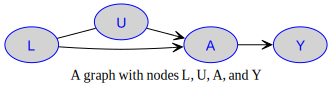

In [5]:
# Import the graphviz library
import graphviz as gr

# Create the graph with consistent styling
g = gr.Digraph(graph_attr={'rankdir': 'LR', 'label': "A graph with nodes L, U, A, and Y"}, 
               edge_attr={'arrowhead': 'vee', 'arrowsize': '1'})

# Add nodes with consistent style: blue color, bold, and font
g.node("L", "L", color="blue", fontcolor="blue", style="filled", fillcolor="lightgrey", fontname="Helvetica")
g.node("U", "U", color="blue", fontcolor="blue", style="filled", fillcolor="lightgrey", fontname="Helvetica")
g.node("A", "A", color="blue", fontcolor="blue", style="filled", fillcolor="lightgrey", fontname="Helvetica")
g.node("Y", "Y", color="blue", fontcolor="blue", style="filled", fillcolor="lightgrey", fontname="Helvetica")

# Add edges with consistent edge attributes
g.edge("L", "U", dir="none")
g.edge("L", "A")
g.edge("U", "A")
g.edge("A", "Y")

# Render the graph
g



**Nodes:** typically represent random variables.

**Edges (arrows):** can be undirected, directed or bi-directed and typically indicate a certain relationship between nodes or possible direct causal effects.

**Path:** A trail of edges going from one node to another, not necessarily following the direction of arrows. a path cannot cross a node more than once.

**Cyclic Graph:** A cyclic graph has at least one path that can be followed through directed edges back to the original node​

**Acyclic Graph:** An acyclic graph is a graph that contains no such cycles.

<br/>

### Example: Paths in a Graph

What are paths from $X$ to $C$ in the following graph?

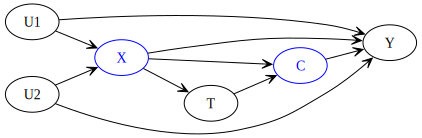

In [351]:
g = gr.Digraph(graph_attr={'rankdir':'LR'}, 
               edge_attr={'arrowhead':'vee', 'arrowsize':'1'})
g.node("X", "X", color="blue", fontcolor="blue")
g.node("C", "C", color="blue", fontcolor="blue")
g.edge("U1", "Y")
g.edge("U1", "X")
g.edge("U2", "X")
g.edge("U2", "Y")
g.edge("X", "T")
g.edge("T", "C")
g.edge("C", "Y")
g.edge("X", "C")
g.edge("X", "Y")
g

Paths from $X$ to $C$ are:

- $ X \rightarrow C$
- $ X \rightarrow T \rightarrow C$
- $ X \rightarrow U_2 \rightarrow Y \rightarrow C$
- $ X \rightarrow U_1 \rightarrow Y \rightarrow C$ 

### More Terminologies:

**Children and Parents:** Nodes directly affected by and affecting other nodes respectively.​

**Ancestors and Descendants:** Nodes directly or indirectly affected by and affecting other nodes

**Exogenous and Endogenous Nodes:** Nodes without and with parents respectively​


### Example: Parentship in a Graph

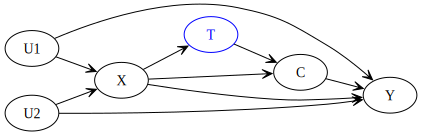

In [354]:
g = gr.Digraph(graph_attr={'rankdir':'LR'}, 
               edge_attr={'arrowhead':'vee', 'arrowsize':'1'})
g.node("T", "T", color="blue", fontcolor="blue")
g.edge("U1", "Y")
g.edge("U1", "X")
g.edge("U2", "X")
g.edge("U2", "Y")
g.edge("X", "T")
g.edge("T", "C")
g.edge("C", "Y")
g.edge("X", "C")
g.edge("X", "Y")
g

Here are parental relations in the graph:

**Parents:** $pa(T) = \{ X \}$​

**Children:** $ch(T) = \{ C \}$​

**Ancestors:** $anc(T) = \{ X, U_1, U_2 \}$​

**Descendants:** $desc(T) = \{ C, Y \}$​

<br/><br/>

---
### 3.2.2. Major DAG Structures

Three primary types of DAG structures are commonly observed: **Fork (Confounder), Chain (Mediator), and V-Structure (Collider)**. Understanding these structures is crucial for identifying the appropriate causal pathways and dealing with potential biases like confounding or collider bias.


### Major DAG Structure 1: Fork (Confounder)

A **fork structure** occurs when a common cause (or confounder) affects both the treatment and the outcome. This type of structure is represented as:

- $A ← C → B$, where:
  - $C$ is the confounder.
  - $C$ is a common cause of $A$ and $B$. 
  - $A$ and $B$ are both influenced by $C$.
  - $A$ and $B$ have a common cause (direct or indirect). 
  - $A$ and $B$ are often referred to as "children" or "descendants" of the common cause.

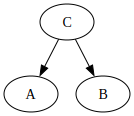

In [357]:

import graphviz as gr

# Create a fork structure (confounder)
fork_dag = gr.Digraph()

# Add edges
fork_dag.edge("C", "A")
fork_dag.edge("C", "B")

# Render the graph
fork_dag


- Since Fork $C$ is a common cause of $A$ and $B$, $A$ and $B$ are not independent in general.

    $A \not\!\perp\!\!\!\perp B$ 

- In fork structure, the dependence flows backward through the arrows and we have what is called a **backdoor path**. 

- We can close the backdoor path and shut down dependence by conditioning on the common cause.

    $A \!\perp\!\!\!\perp B | C$


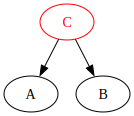

In [359]:
import graphviz as gr

# Create a fork structure (confounder)
fork_dag = gr.Digraph()

# Add node C with red border and label
fork_dag.node("C", color="red", fontcolor="red")

# Add edges
fork_dag.edge("C", "A")
fork_dag.edge("C", "B")

# Render the graph
fork_dag



### Fork Bias
- Forks represent situations where two variables appear to be associated or correlated, but the association is not due to a direct causal relationship between them. Instead, the association is induced by the shared influence of the common cause.

- Failure to address a fork confounder can lead to biased estimates of the causal effect between the treatment and outcome. Neglecting the confounder can result in mistakenly attributing the observed association to a direct causal effect, when it is actually due, at least in part, to the unmeasured confounder.
  
- This bias is also called **[confounding bias](https://catalogofbias.org/biases/confounding/)**.

### Confounder Structure Example: Ice Cream Consumption, Sunburns, and Hot Temperature

In hot summer months, people tend to consume more ice cream and are also more likely to get sunburns. While it might seem that **Ice Cream Consumption** and **Number of Sunburns** are related, this relationship is actually driven by a third variable, **Hot Temperature**. 

<img src="img/ch3/IceCream-Sunburn.png" alt="img" width="500"/>

This is an example of a **fork structure** where **Hot Temperature (T)** is the common cause (confounder) that influences both **Ice Cream Consumption (I)** and **Number of Sunburns (S)**. Understanding this structure helps to avoid drawing spurious conclusions about the relationship between **I** and **S**.


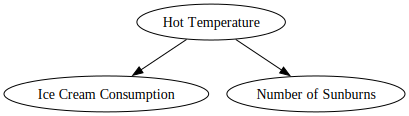

In [362]:
### 1. Visualize the DAG (Fork Structure)
import graphviz as gr

# Create a fork structure for Ice Cream and Sunburns example
fork_dag = gr.Digraph()

# Add nodes
fork_dag.node("T", label="Hot Temperature", color="black", fontcolor="black")
fork_dag.node("I", label="Ice Cream Consumption", color="black", fontcolor="black")
fork_dag.node("S", label="Number of Sunburns", color="black", fontcolor="black")

# Add edges representing the fork structure
fork_dag.edge("T", "I")  # Hot Temperature influences Ice Cream Consumption
fork_dag.edge("T", "S")  # Hot Temperature influences Number of Sunburns

# Render the graph
fork_dag

### Simulate Data:
Let's generate synthetic data for the three variables:
- **Hot Temperature (T)** drives both **Ice Cream Consumption (I)** and **Number of Sunburns (S)**.


In [364]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(42)

# Simulating Hot Temperature (T)
hot_temperature = np.random.normal(loc=30, scale=5, size=100)  # Average temperature of 30 degrees with some variation

# Simulating Ice Cream Consumption (I) based on Temperature (T)
ice_cream_consumption = 2 * hot_temperature + np.random.normal(loc=0, scale=5, size=100)  # Higher temperature, more ice cream

# Simulating Number of Sunburns (S) based on Temperature (T)
number_of_sunburns = 1.5 * hot_temperature + np.random.normal(loc=0, scale=3, size=100)  # Higher temperature, more sunburns

# Creating a DataFrame for the data
data = pd.DataFrame({
    'Hot Temperature': hot_temperature,
    'Ice Cream Consumption': ice_cream_consumption,
    'Number of Sunburns': number_of_sunburns
})

# Display the first few rows of the dataset
data.head()


,Hot Temperature,Ice Cream Consumption,Number of Sunburns
0,32.483571,57.890288,49.798718
1,29.308678,56.514130,45.645371
2,33.238443,64.763313,53.106818
3,37.615149,71.218912,59.584130
4,28.829233,56.852038,39.110842


### Explore Relationships
We now use a scatter plot matrix to visualize the pairwise relationships between **Hot Temperature**, **Ice Cream Consumption**, and **Number of Sunburns**.

${Ice\ Cream\ Consumption} \not\!\perp\!\!\!\perp {Number\ of\ Sunburns} $ 


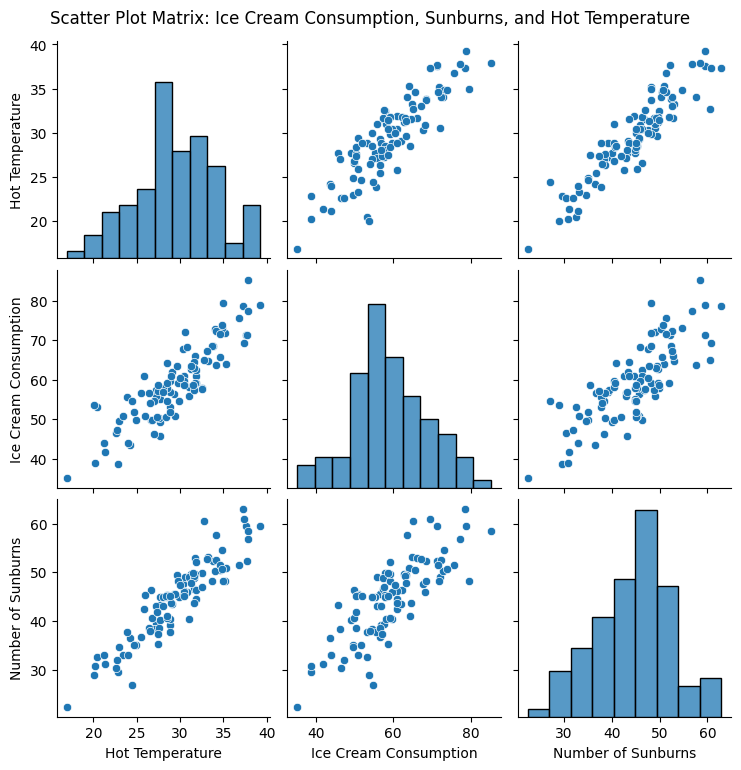

In [366]:
# Visualizing the scatter plot matrix
sns.pairplot(data)
plt.suptitle("Scatter Plot Matrix: Ice Cream Consumption, Sunburns, and Hot Temperature", y=1.02)
plt.show()


### Observations

From the **scatter plot matrix**, you can observe:
- **Hot Temperature** has a positive correlation with both **Ice Cream Consumption** and **Number of Sunburns**. This makes sense because hotter days lead to more ice cream consumption and an increased likelihood of sunburns.
- There may also appear to be a correlation between **Ice Cream Consumption** and **Number of Sunburns**. However, this is a spurious correlation driven by the confounding effect of **Hot Temperature**. 

Without accounting for **Hot Temperature**, we might mistakenly conclude that eating more ice cream causes sunburns, but the true underlying cause is the hotter weather.

### Conditioning on the confunder (Hot Temperature)

Now, let condition on the confunder, **Hot Temperature**:

${Ice\ Cream\ Consumption} \!\perp\!\!\!\perp {Number\ of\ Sunburns} | {Hot\ Temperature}$ 


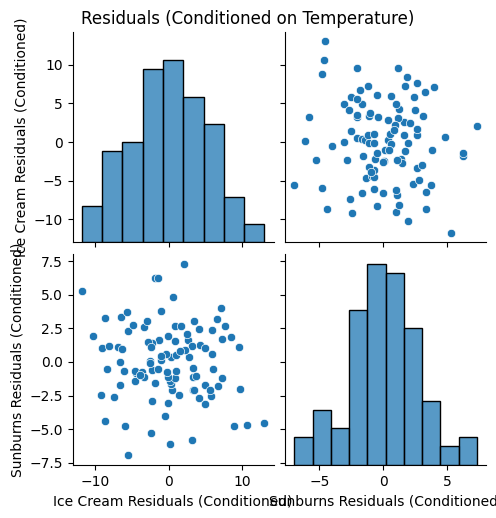

Correlation between Ice Cream Consumption and Sunburns after conditioning on Temperature:
                                   Ice Cream Residuals (Conditioned)  \
Ice Cream Residuals (Conditioned)                            1.00000   
Sunburns Residuals (Conditioned)                            -0.10736   

                                   Sunburns Residuals (Conditioned)  
Ice Cream Residuals (Conditioned)                          -0.10736  
Sunburns Residuals (Conditioned)                            1.00000  


In [368]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Re-define variables from the first part

# Simulating Hot Temperature (T)
hot_temperature = np.random.normal(loc=30, scale=5, size=100)  # Average temperature of 30 degrees with some variation

# Simulating Ice Cream Consumption (I) based on Temperature (T)
ice_cream_consumption = 2 * hot_temperature + np.random.normal(loc=0, scale=5, size=100)  # Higher temperature, more ice cream

# Simulating Number of Sunburns (S) based on Temperature (T)
number_of_sunburns = 1.5 * hot_temperature + np.random.normal(loc=0, scale=3, size=100)  # Higher temperature, more sunburns

# Conditioning on the confounder (Temperature)

# Regress Ice Cream Consumption on Temperature
ice_cream_residuals = ice_cream_consumption - LinearRegression().fit(hot_temperature.reshape(-1, 1), ice_cream_consumption).predict(hot_temperature.reshape(-1, 1))

# Regress Number of Sunburns on Temperature
sunburns_residuals = number_of_sunburns - LinearRegression().fit(hot_temperature.reshape(-1, 1), number_of_sunburns).predict(hot_temperature.reshape(-1, 1))

# Create a DataFrame of the residuals
residuals_data = pd.DataFrame({
    'Ice Cream Residuals (Conditioned)': ice_cream_residuals,
    'Sunburns Residuals (Conditioned)': sunburns_residuals
})

# Visualize residuals (relationship after conditioning)
sns.pairplot(residuals_data)
plt.suptitle("Residuals (Conditioned on Temperature)", y=1.02)
plt.show()

# Correlation matrix after conditioning
correlation_after = residuals_data.corr()
print("Correlation between Ice Cream Consumption and Sunburns after conditioning on Temperature:")
print(correlation_after)


**Independence After Conditioning**: The scatter plot and correlation matrix show that the correlation between Ice Cream Consumption and Sunburns is near zero (-0.003), indicating that after removing the effect of Temperature, the two variables are effectively independent. This confirms that the initial observed correlation was due to the common influence of Temperature.

**Residuals Visualization**: The residuals' scatter plot is a cloud of points with no clear pattern, which visually confirms that Ice Cream Consumption and Sunburns have no direct relationship after adjusting for Temperature. This supports the concept that conditioning on a confounder (in this case, Temperature) can remove spurious correlations between two otherwise unrelated variables.

---

### Major DAG Structure 2: Chain (Mediator)

A **chain structure** represents a causal pathway where one variable transmits the effect of the cause to the outcome. This structure is represented as:

- $A → C → B$, where:
  - $A$ is the cause.
  - $C$ is the mediator.
  - $B$ is the outcome.
  - A node $C$ is a mediator if it lies on a directed path from $A$ to $B$.


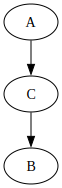

In [371]:
# Create a chain structure (mediator)
chain_dag = gr.Digraph()

# Add edges
chain_dag.edge("A", "C")
chain_dag.edge("C", "B")

# Render the graph
chain_dag


As a general rule, the dependence flow in the direct path from $A$ to $B$ is blocked when we condition on an intermediary variable $C$.

  - $A \not\!\perp\!\!\!\perp B$   

  - $A \!\perp\!\!\!\perp B | C$ 

In this case, $C$ mediates the relationship between $A$ and $B$. It is important to distinguish this indirect path from a direct causal effect between $A$ and $B$.

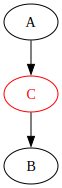

In [373]:
import graphviz as gr

# Create a chain structure (mediator)
chain_dag = gr.Digraph()

# Add node C with red border and red font
chain_dag.node("C", color="red", fontcolor="red")

# Add edges representing the chain structure
chain_dag.edge("A", "C")
chain_dag.edge("C", "B")

# Render the graph
chain_dag

### Chain Structure Example: Exercise, Weight Loss, and Heart Health

### Background:
In this example, we explore how **Exercise** leads to **Weight Loss**, which in turn improves **Heart Health**. This represents a **chain structure**, where **Exercise (X)** influences **Weight Loss (M)**, and **Weight Loss** mediates the effect of **Exercise** on **Heart Health (Y)**.

This scenario helps illustrate mediation, where the effect of Exercise on Heart Health is both direct and indirect, through the intermediate variable of Weight Loss.

- **Exercise (X)** → leads to → **Weight Loss (M)** → leads to → **Improved Heart Health (Y)**.


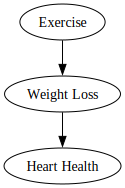

In [375]:
import graphviz as gr

# Create a chain structure for Exercise, Weight Loss, and Heart Health
chain_dag = gr.Digraph()

# Add nodes
chain_dag.node("X", label="Exercise")
chain_dag.node("M", label="Weight Loss")
chain_dag.node("Y", label="Heart Health")

# Add edges representing the chain structure
chain_dag.edge("X", "M")  # Exercise leads to Weight Loss
chain_dag.edge("M", "Y")  # Weight Loss leads to Improved Heart Health

# Render the graph
chain_dag



### Simulate Data:

Next, we simulate synthetic data to model the relationships between **Exercise**, **Weight Loss**, and **Heart Health**.


In [377]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(42)

# Simulating Exercise (X)
exercise = np.random.normal(loc=10, scale=2, size=100)  # Average exercise hours per week with some variation

# Simulating Weight Loss (M) based on Exercise (X)
weight_loss = 5 * exercise + np.random.normal(loc=0, scale=3, size=100)  # More exercise leads to greater weight loss

# Simulating Heart Health (Y) based on Weight Loss (M)
heart_health = 3 * weight_loss + np.random.normal(loc=0, scale=5, size=100)  # Greater weight loss improves heart health

# Creating a DataFrame for the data
data = pd.DataFrame({
    'Exercise': exercise,
    'Weight Loss': weight_loss,
    'Heart Health': heart_health
})

# Display the first few rows of the dataset
data.head()


,Exercise,Weight Loss,Heart Health
0,10.993428,50.721029,153.952025
1,9.723471,47.355421,144.870186
2,11.295377,55.448742,171.761482
3,13.046060,62.823467,193.739411
4,9.531693,47.174609,134.635481



### Explore Relationships

We will now create a scatter plot matrix to visualize the pairwise relationships between **Exercise**, **Weight Loss**, and **Heart Health**.

${Exercise} \not\!\perp\!\!\!\perp {Heart\ Health} $ 


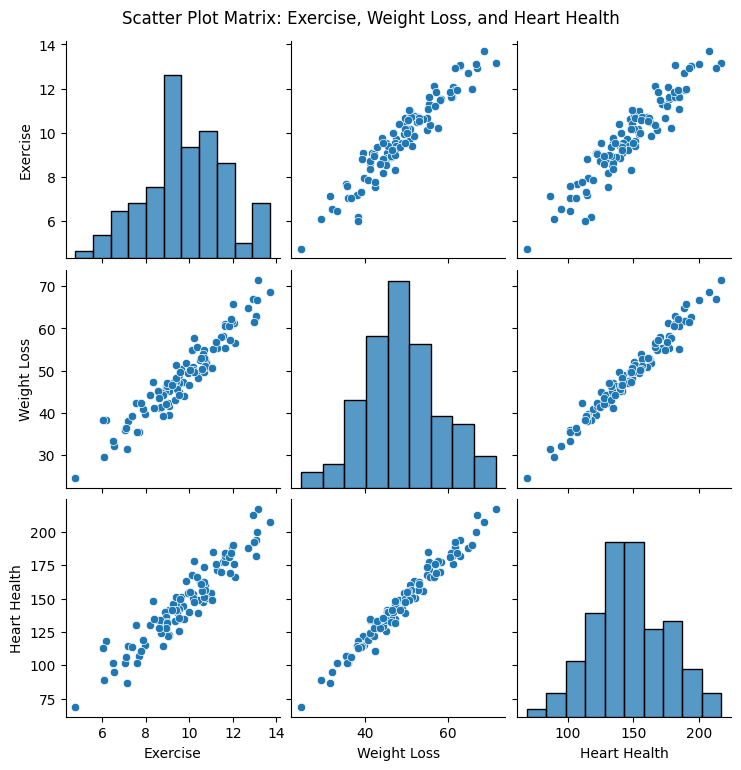

In [379]:
# Visualizing the scatter plot matrix
sns.pairplot(data)
plt.suptitle("Scatter Plot Matrix: Exercise, Weight Loss, and Heart Health", y=1.02)
plt.show()


### Observations:

- **Exercise and Weight Loss**: There is a strong positive relationship between Exercise and Weight Loss. More exercise leads to greater weight loss.
  
- **Weight Loss and Heart Health**: A positive relationship also exists between Weight Loss and Heart Health. Weight loss improves heart health.

- **Exercise and Heart Health**: While Exercise is positively related to Heart Health, it is important to note that the relationship is **partly indirect** through Weight Loss.

- **Exercise** directly influences **Weight Loss**, which in turn influences **Heart Health**. This is a **mediating relationship**, where the effect of Exercise on Heart Health is mediated by Weight Loss.


### Conditioning on the Mediator (Weight Loss)

In this second part, we condition on Weight Loss (M) to analyze the direct relationship between Exercise (X) and Heart Health (Y), adjusting for the effect of the mediator.

${Exercise} \!\perp\!\!\!\perp {Heart\ Healths} | {Weight\ Loss}$ 


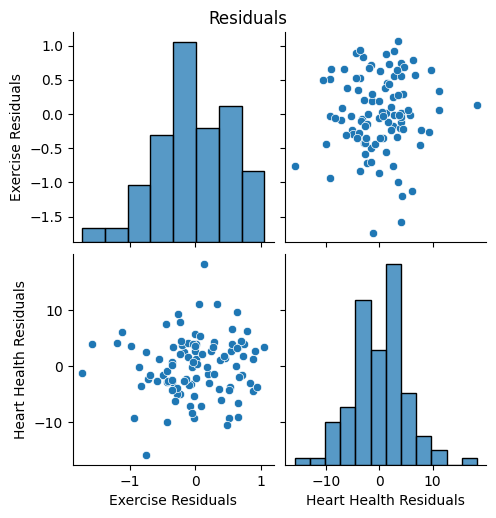

Correlation between Exercise and Heart Health after conditioning on Weight Loss:
                        Exercise Residuals  Heart Health Residuals
Exercise Residuals                1.000000                0.070463
Heart Health Residuals            0.070463                1.000000


In [382]:
from sklearn.linear_model import LinearRegression

# Regress Heart Health (Y) on Weight Loss (M) to get the residuals
heart_health_residuals = heart_health - LinearRegression().fit(weight_loss.reshape(-1, 1), heart_health).predict(weight_loss.reshape(-1, 1))

# Regress Exercise (X) on Weight Loss (M) to get the residuals
exercise_residuals = exercise - LinearRegression().fit(weight_loss.reshape(-1, 1), exercise).predict(weight_loss.reshape(-1, 1))

# Create a DataFrame for the residuals
residuals_data = pd.DataFrame({
    'Exercise Residuals': exercise_residuals,
    'Heart Health Residuals': heart_health_residuals
})

# Visualize residuals (relationship after conditioning)
sns.pairplot(residuals_data)
plt.suptitle("Residuals", y=1.02)
plt.show()

# Correlation matrix after conditioning
correlation_after = residuals_data.corr()
print("Correlation between Exercise and Heart Health after conditioning on Weight Loss:")
print(correlation_after)


**Weak Residual Correlation**: After conditioning on Weight Loss (M), the residuals show that the correlation between Exercise (X) and Heart Health (Y) has drastically weakened (correlation = 0.07), which is close to zero. This suggests that Weight Loss largely explains the relationship between Exercise and Heart Health. Once we account for Weight Loss, there is minimal direct association between Exercise and Heart Health.

**Residual Scatter Plot**: The scatter plot of the residuals between Exercise and Heart Health shows no clear pattern, confirming the weak residual correlation. This indicates that after controlling for Weight Loss, Exercise and Heart Health behave almost independently, meaning the initial relationship observed between them was mediated through Weight Loss. 

---

### Major DAG Structure 3: V-Structure (Collider)

A **V-structure**, or **collider**, occurs when two variables have a common effect. This structure is represented as:

- $A → C ← B$, where:
  - $A$ and $B$ are independent causes of the collider $C$.
    
      $A \!\perp\!\!\!\perp B$   


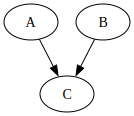

In [385]:
# Create a V-structure (collider)
vstructure_dag = gr.Digraph()

# Add edges
vstructure_dag.edge("A", "C")
vstructure_dag.edge("B", "C")

# Render the graph
vstructure_dag


- As a general rule, **conditioning (adjusting or controlling)** on a collider opens the causal path. Not conditioning on it leaves it closed.
- This phenomenon is sometimes called **explaining away**, because one cause already explains the effect, making the other cause less likely.

  $A \not\!\perp\!\!\!\perp B | C$ 

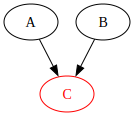

In [387]:
import graphviz as gr

# Create a V-structure (collider)
vstructure_dag = gr.Digraph()

# Add node C with red border and red label
vstructure_dag.node("C", color="red", fontcolor="red")

# Add edges representing the V-structure
vstructure_dag.edge("A", "C")
vstructure_dag.edge("B", "C")

# Render the graph
vstructure_dag


### Collider Bias or Berkson's paradox

- **Conditioning on** or **observing** a collider can lead to spurious associations between the variables that connect it. This phenomenon is known as **[collider bias](https://catalogofbias.org/biases/collider-bias/)** or **Berkson's paradox**.
  
- It occurs because conditioning on a collider variable can induce a correlation between the variables that influence it, even if they are not causally related.

  

### Collider Structure Example: Job Skill, Family Connections, and Job Offer

### Background:

In this example, we explore how two independent factors, **Job Skill** and **Family Connections**, affect the likelihood of receiving a **Job Offer**. This represents a **collider structure**, where both **Job Skill (A)** and **Family Connections (B)** influence the **Job Offer (C)** independently.

Importantly, if we were to condition on **Job Offer (the collider)**, a spurious relationship might appear between **Job Skill** and **Family Connections**, even though they are actually independent.

In this scenario:
- **Job Skill (A)** → **Job Offer (C)** ← **Family Connections (B)**


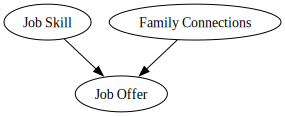

In [390]:
import graphviz as gr

# Create a V-structure (collider) for Job Skill, Family Connections, and Job Offer
vstructure_dag = gr.Digraph()

# Add nodes
vstructure_dag.node("A", label="Job Skill")
vstructure_dag.node("B", label="Family Connections")
vstructure_dag.node("C", label="Job Offer")  # Default color for Job Offer

# Add edges representing the collider structure
vstructure_dag.edge("A", "C")  # Job Skill influences Job Offer
vstructure_dag.edge("B", "C")  # Family Connections influence Job Offer

# Render the graph
vstructure_dag




### Simulate Data:

Now, we will simulate some synthetic data for **Job Skill (A)**, **Family Connections (B)**, and **Job Offer (C)**.


In [392]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(42)

# Simulating Job Skill (A)
job_skill = np.random.normal(loc=70, scale=10, size=100)  # Average job skill score (out of 100)

# Simulating Family Connections (B)
family_connections = np.random.normal(loc=50, scale=15, size=100)  # Family connections score (out of 100)

# Simulating Job Offer (C) based on both Job Skill and Family Connections
job_offer = 0.3 * job_skill + 0.4 * family_connections + np.random.normal(loc=0, scale=5, size=100)  # Job Offer score

# Creating a DataFrame for the data
data = pd.DataFrame({
    'Job Skill': job_skill,
    'Family Connections': family_connections,
    'Job Offer': job_offer
})

# Display the first few rows of the dataset
data.head()


,Job Skill,Family Connections,Job Offer
0,74.967142,28.769439,35.786855
1,68.617357,43.690320,40.865258
2,76.476885,44.859282,46.302035
3,85.230299,37.965841,46.024436
4,67.658466,47.580714,32.441479



### Explore Relationships

We will now create a scatter plot matrix to visualize the pairwise relationships between **Job Skill**, **Family Connections**, and **Job Offer**.

${Job\ Skill} \!\perp\!\!\!\perp {Family\ Connections}$ 


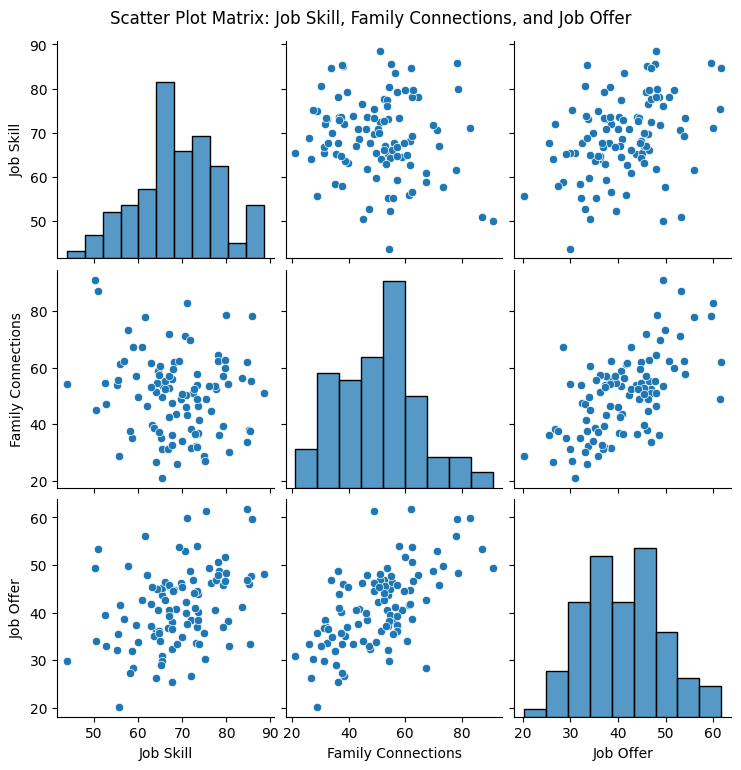

In [394]:
# Visualizing the scatter plot matrix
sns.pairplot(data)
plt.suptitle("Scatter Plot Matrix: Job Skill, Family Connections, and Job Offer", y=1.02)
plt.show()



### Observations:

- **Job Skill and Job Offer**: A positive relationship is observed between **Job Skill** and **Job Offer**. The higher the job skill, the more likely a person is to receive a job offer.
  
- **Family Connections and Job Offer**: Similarly, a positive relationship exists between **Family Connections** and **Job Offer**. The stronger the family connections, the more likely a person is to receive a job offer.

- **Job Skill and Family Connections**: While **Job Skill** and **Family Connections** are independent in reality, they might appear correlated if we condition on **Job Offer** (the collider). This could create a spurious relationship between the two factors due to **collider bias**.


- In the **collider structure**, both **Job Skill** and **Family Connections** affect the **Job Offer** independently. If we mistakenly control for **Job Offer** (e.g., by looking only at people who received a job offer), we might observe a false relationship between **Job Skill** and **Family Connections**.
  


### Conditioning on the Collider (Job Offer)
Now, we will condition on the **Job Offer (C)** and observe how this affects the relationship between **Job Skill (A)** and **Family Connections (B)**.

${Job\ Skill} \not\!\perp\!\!\!\perp {Family\ Connections} | {Job\ Offer}$ 

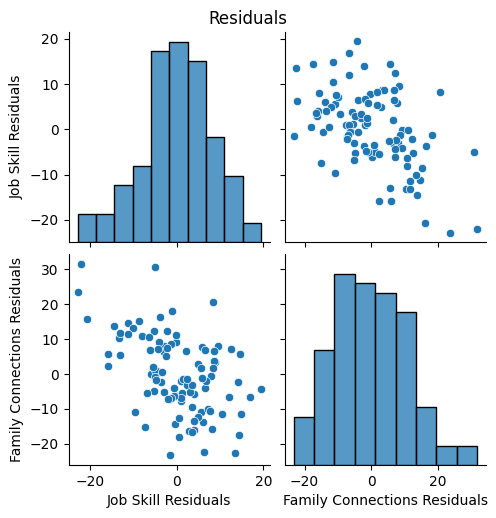

Correlation between Job Skill and Family Connections after conditioning on Job Offer:
                              Job Skill Residuals  \
Job Skill Residuals                      1.000000   
Family Connections Residuals            -0.492376   

                              Family Connections Residuals  
Job Skill Residuals                              -0.492376  
Family Connections Residuals                      1.000000  


In [397]:
from sklearn.linear_model import LinearRegression

# Regress Job Skill (A) on Job Offer (C) to get the residuals
job_skill_residuals = job_skill - LinearRegression().fit(job_offer.reshape(-1, 1), job_skill).predict(job_offer.reshape(-1, 1))

# Regress Family Connections (B) on Job Offer (C) to get the residuals
family_connections_residuals = family_connections - LinearRegression().fit(job_offer.reshape(-1, 1), family_connections).predict(job_offer.reshape(-1, 1))

# Create a DataFrame of the residuals
residuals_data = pd.DataFrame({
    'Job Skill Residuals': job_skill_residuals,
    'Family Connections Residuals': family_connections_residuals
})

# Visualize residuals (relationship after conditioning)
sns.pairplot(residuals_data)
plt.suptitle("Residuals", y=1.02)
plt.show()

# Correlation matrix after conditioning
correlation_after = residuals_data.corr()
print("Correlation between Job Skill and Family Connections after conditioning on Job Offer:")
print(correlation_after)


**Induced Negative Correlation**: After conditioning on the collider (Job Offer), the scatter plot and correlation matrix reveal a negative correlation of -0.49 between Job Skill and Family Connections. This is a classic sign of collider bias: although Job Skill and Family Connections are independent in the general population, conditioning on their common effect (Job Offer) induces a spurious correlation between them.

**Residual Scatter Plot**: The scatter plot of the residuals shows a negative trend, further confirming that conditioning on Job Offer creates an artificial relationship between Job Skill and Family Connections, even though no direct relationship exists in the data without conditioning.

---

### 3.3. Paths and Blocking Paths in Causal Graphs

In causal graphs, paths are sequences of edges that connect two variables, and understanding how these paths are open or blocked is essential for reasoning about causal and probabilistic relationships.


The causal path from $X$ to $C$ mediate the causal effect of $X$ on $C$, the non-causal path do not.

For example in the graphs below, the causal path between $X$ and $C$ are highlighted in red.

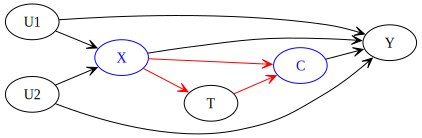

In [400]:
import graphviz as gr

# Create the DAG with improved consistency
g = gr.Digraph(
    graph_attr={'rankdir': 'LR'},  # Left-to-right layout for consistency
    edge_attr={'arrowhead': 'vee', 'arrowsize': '1'}  # Consistent edge styling
)

# Add nodes with consistent color and styling
g.node("X", "X", color="blue", fontcolor="blue")  # X node in blue
g.node("C", "C", color="blue", fontcolor="blue")  # C node in blue

# Add edges for unobserved confounders U1 and U2
g.edge("U1", "Y")  # U1 influences Y
g.edge("U1", "X")  # U1 influences X
g.edge("U2", "X")  # U2 influences X
g.edge("U2", "Y")  # U2 influences Y

# Add edges representing relationships between X, T, C, and Y
g.edge("X", "T", color="red", fontcolor="red")  # X to T (red for emphasis)
g.edge("T", "C", color="red", fontcolor="red")  # T to C (red for emphasis)
g.edge("C", "Y")  # C to Y
g.edge("X", "C", color="red", fontcolor="red")  # X to C (red for emphasis)
g.edge("X", "Y")  # X to Y

# Render the graph
g


### Open and Blocked Paths

A path is considered open if it allows information to flow between the connected variables, whereas a path is blocked if the information flow is prevented by conditioning on certain variables. The rules for determining whether a path is open or blocked depend on the presence of colliders and non-colliders along the path.

Path blocking in Directed Acyclic Graphs (DAGs) refers to the process of identifying variables or conditions that can close or block a specific causal path between two variables. It involves determining which variables need to be controlled for or conditioned on to prevent spurious associations or biases when estimating causal effects.

An **active path** is *open* and allows for potential causal influence between the variables, while an **inactive path** is *blocked* or closed, preventing any direct causal influence.

Path are either open or blocked, according to two rules:

- **Rule 1:** A path is blocked if somewhere along the path, there is a variable $C$ that sits in a *chain*, or sits in a *fork* and we have conditioned for $C$. 

- **Rule 2:** A path is blocked if somewhere along the path, there is a variable $C$ that sits in a *collider* and we have not conditioned for $C$, or any of its descendents.

### Path Blocking Example: a 4 Nodes Graph

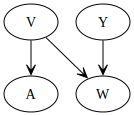

In [403]:
g = gr.Digraph(edge_attr={'arrowhead':'vee', 'arrowsize':'1'})
g.edge("V", "A")
g.edge("V", "W")
g.edge("Y", "W")
g

From the causal graph above we notice that:
- Conditioning for **V** blocks the path from **A** to **W** (rule 1) 
- Conditioning for **W** leaves the path open (rule 2) from **A** to **Y**. 
- Conditioning for both **V** and **W** blocks the path from **A** to **Y**.

---

 ## Section 3.4. d-Separation and Independence Assumptions


The concept of **d-separation** is central to determining when two variables are conditionally independent given a set of other variables. 

* Two variables $X$ and $Y$ are d-separated by a set of variables $Z$ if all paths between $X$ and $Y$  are blocked by $Z$  according to the rules of open and blocked paths described above.* 
Formally, d-separation is the graphical criterion for conditional independence
*  If $X$  and $Y$  are d-separated by $Z$, then $X$ and $Y$  are conditionally independent given $Z$.


We have seen follwing concepts in the previous section. We repeat them with a slighly diffrent language to better explan the d-Separation Basics.

* In a DAG, a **path** is a sequence of edges that connect two nodes. These paths can carry associations or causal influences. To assess whether two variables are conditionally independent, we use **d-separation** to block the paths between them.

Different Types of Structures that Affect d-Separation:

#### Chain ($A \to B \to C$)
- Without conditioning, $A$ and $C$ are dependent because information flows through $B$.
- If we condition on $B$ (i.e., we know $B$'s value), the path is blocked, and $A$ becomes independent of $C$.

#### Fork ($A \leftarrow B \to C$)
- Without conditioning, $A$ and $C$ are dependent because they share a common cause, $B$.
- Conditioning on $B$ blocks the path and renders $A$ and $C$ independent.

#### Collider ($A \to B \leftarrow C$)
- Without conditioning, $A$ and $C$ are independent because the path is blocked at $C$ (the collider).
- If we condition on $B$ or its descendants, the path is unblocked, and $A$ and $C$ become dependent (collider bias).



### d-Separation Rules 


D-separation relies on a set of rules, often referred to as path blocking rules or **d-separation rules**, to determine when a path is blocked. These rules identify the necessary variables to condition on to close a specific path and prevent spurious associations or biases in estimating causal effects.


**d-separation in Sets:** Sets of variables $A$ and $B$ are d-separated (or blocked) by $C$ if all paths between $A$ and $B$ are blocked by $C$. d-separation implies: 

$A \perp \!\!\! \perp B | C$.


**d-separation in Paths:** D-separation determines which paths transmit association, and which ones don’t.
Formally, a path **P** is said to be d-separated (or blocked) by a conditioning set of nodes $\{Z\}$ if:

1. **P** contains a chain $A \rightarrow M \rightarrow B$ or a fork $A \leftarrow M \rightarrow B$ such that the middle node $M$ is in $\{Z\}$, or
2. **P** contains a collider $A \rightarrow M \leftarrow B$ such that neither the middle node $M$, nor any descendant of $M$, is in $\{Z\}$.


**d-connected in Paths:** A path **P** is said to be d-connected (or unblocked or open) by a conditioning set of nodes $\{Z\}$ if it is not d-separated.


In other words:

- *Blocked* (d-separated) paths don’t transmit association (information). 

- *Unblocked* (d-connected) paths may transmit association (information).


<br/>
The three aforementioned blocking criteria can be rephased as: 

- Conditioning on a non-collider blocks a path, 

- Conditioning on a collider, or a descendent of a collider, unblocks a path, 

- Not conditioning on a collider leaves a path “naturally” blocked.



### Path Blocking and Independence 

- Two variables that are d-separated along all paths given $\{Z\}$ are <font color='red'>conditionally independent given $\{Z\}$.</font>

- Two variables that are *NOT* d-separated along all paths given $\{Z\}$ are <font color='red'>potentially dependent given $\{Z\}$.</font>

### d-Separation Example, a 10 Nodes Graph

We use the following DAG from [Bardy Neal course](https://www.bradyneal.com/causal-inference-course) to see blocked and un-blocked pathes between $T$ and $Y$ for different controlling (conditioning) cases.

![img](img/ch3/graph_Dsep_example_case0.png)

<br/><br/>
**Case 1:** In the following graph, is  $T \perp \!\!\! \perp Y | M_1$  valid?

![img](img/ch3/graph_Dsep_example_case1.png)




**NO!**, 
- the chain path $T-M_1-M_2-Y$ is blocked ($M_1$ is in the conditioning set) 
- the fork path $T-W_1-W_2-W_3-Y$ is not blocked.
- the collider path $T-X_1-X_2-X_3-Y$ is blocked.

<br/><br/>
**Case 2:** In the following graph, is  $T \perp \!\!\! \perp Y | M_1, W_2 $  valid?  

![img](img/ch3/graph_Dsep_example_case2.png)


**YES!**, 
- the chain path $T-M_1-M_2-Y$ is blocked ($M_1$ is in the conditioning set) 
- the fork path $T-W_1-W_2-W_3-Y$ is blocked ($W_2$ is in the conditioning set).
- the collider path $T-X_1-X_2-X_3-Y$ is blocked.

<br/><br/>
**Case 3:** In the following graph, is  $T \perp \!\!\! \perp Y | M_1, W_3 $  valid?  

![img](img/ch3/graph_Dsep_example_case3.png)

**YES!**,
- the chain path $T-M_1-M_2-Y$ is blocked ($M_1$ is in the conditioning set). 
- the fork path $T-W_1-W_2-W_3-Y$ is blocked ($W_3$ is in the conditioning set).
- the collider path $T-X_1-X_2-X_3-Y$ is blocked.

<br/><br/>
**Case 4:** In the following graph, is  $T \perp \!\!\! \perp Y | M_1, W_1, W_2, X_2$  valid?  

![img](img/ch3/graph_Dsep_example_case4.png)

**NO!**,
- the chain path $T-M_1-M_2-Y$ is blocked ($M_1$ is in the conditioning set). 
- the fork path $T-W_1-W_2-W_3-Y$ is blocked ($W_2, W_3$ are in the conditioning set).
- the collider path $T-X_1-X_2-X_3-Y$ is NOT blocked ($X_2$ is in the conditioning set)

<br/><br/>
**Case 5:** In the following graph, is  $T \perp \!\!\! \perp Y | M_1, W_2, W_3, X_1, X_2?$  valid?

![img](img/ch3/graph_Dsep_example_case5.png)

**YES!**,
- the chain path $T-M_1-M_2-Y$ is blocked ($M_1$ is in the conditioning set). 
- the fork path $T-W_1-W_2-W_3-Y$ is blocked ($W_2, W_3$ are in the conditioning set).
- the collider path $T-X_1-X_2-X_3-Y$ is blocked ($X_1$ is in the conditioning set)

### Example: d-separation Test with Python

Testing the d-separation manually is not feasible for large graphs.
We can use the [networkx](https://networkx.org) python library instead to test for conditional independence.

NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

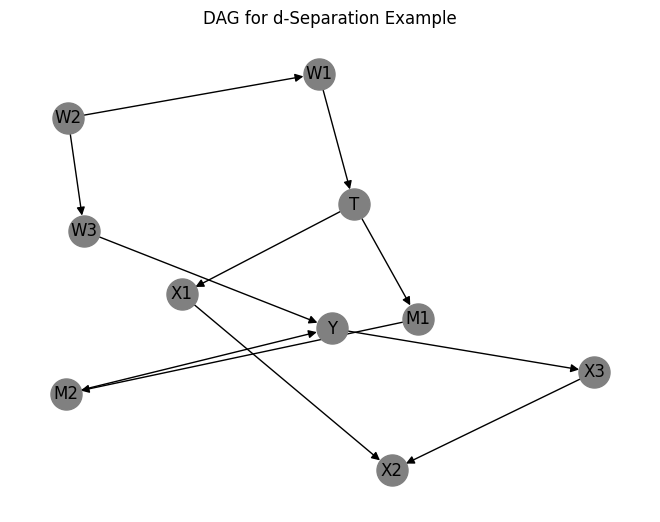

AttributeError: 'BayesianNetwork' object has no attribute 'is_d_separated'

In [419]:
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.models import BayesianNetwork

# Define the DAG structure
edges = [
    ("T", "M1"),
    ("M1", "M2"),
    ("M2", "Y"),
    ("T", "X1"),
    ("X1", "X2"),
    ("Y", "X3"),
    ("X3", "X2"),
    ("W1", "T"),
    ("W2", "W1"),
    ("W2", "W3"),
    ("W3", "Y")
]

# Visualize the DAG using NetworkX for graph plotting
G = nx.DiGraph()
G.add_edges_from(edges)

# Use spring_layout for visualization
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='gray', node_size=500, width=1, arrowstyle='-|>', arrowsize=12)
plt.title("DAG for d-Separation Example")
plt.show()

# Now, use pgmpy to define the Bayesian Network structure
model = BayesianNetwork(edges)

# Use the correct method to check d-separation
# This is now `is_d_separated()` in recent versions of pgmpy
from pgmpy.independencies import Independencies

is_d_sep = model.is_d_separated(['T'], ['Y'], {'M1', 'W2'})
print(f"Is T and Y d-separated given M1 and W2?: {is_d_sep}")

# You can also check without conditioning on any variables
is_d_sep_no_condition = model.is_d_separated(['T'], ['Y'], set())
print(f"Is T and Y d-separated without conditioning?: {is_d_sep_no_condition}")


Is  $T \perp \!\!\! \perp Y | M_1$  valid?

In [420]:
#Is T and Y d-separated given M1? 
nx.d_separated(G, {"T"}, {"Y"}, {"M1"})

/var/folders/dq/t_6k9k1j2kgbrldmxlbz46240000gn/T/ipykernel_1857/145878120.py:2: DeprecationWarning: d_separated is deprecated and will be removed in NetworkX v3.5.Please use `is_d_separator(G, x, y, z)`.
  nx.d_separated(G, {"T"}, {"Y"}, {"M1"})


False

Is  $T \perp \!\!\! \perp Y | M_1, W_2 $  valid? 

In [422]:
#Is T and Y d-separated given M1 and W2? 
nx.d_separated(G, {"T"}, {"Y"}, {"M1", "W2"})

/var/folders/dq/t_6k9k1j2kgbrldmxlbz46240000gn/T/ipykernel_1857/3360455046.py:2: DeprecationWarning: d_separated is deprecated and will be removed in NetworkX v3.5.Please use `is_d_separator(G, x, y, z)`.
  nx.d_separated(G, {"T"}, {"Y"}, {"M1", "W2"})


True

---

# 3.4. Markov Properties in Causal Graphical Models

In the context of causal inference and graphical models, the **Markov properties** are fundamental to understanding the relationship between graph structures (DAGs) and probability distributions. The Markov properties allow us to represent conditional independence relationships between variables using the structure of a Directed Acyclic Graph (DAG).


- When a distribution $p$ is Markovian with respect to a graph $\mathcal{G}$, this graph encodes certain independence in the distribution.

- Markov property links causal DAGs to conditional probabilities (from data).

---

## 3.4.1. Bayesian Networks and Factorization

* Bayesian networks form the foundation for causal graphical models, as causal models can be viewed as a special type of probabilistic graphical models. 
* Probabilistic graphical models are statistical models, while causal graphical models are causal models. 
* Bayesian networks are the primary probabilistic graphical model that causal graphical models (also called causal Bayesian networks) inherit most of their properties from.


Imagine that we are primarily concerned with modeling associations between variables, without making any causal assumptions. In such a case, we want to model the data distribution $P(x_1, x_2, \dots, x_n)$. 

The **chain rule** of probability allows us to break down any joint probability distribution into a series of conditional probabilities. This factorization is useful because it expresses the joint probability of a set of variables as the product of simpler, sequential conditional probabilities.

The joint probability distribution of multiple variables $P(x_1, x_2, \dots, x_n)$ can be factorized using the chain rule as follows:

$$
P(x_1, x_2, \dots, x_n) = P(x_1) \prod_{i=2}^{n} P(x_i \mid x_{i-1}, \dots, x_1)
$$

- $P(x_1)$: This is the **marginal probability** of the first variable $x_1$.
- $P(x_2 \mid x_1)$: The **conditional probability** of $x_2$, given $x_1$.
- $P(x_3 \mid x_2, x_1)$: The **conditional probability** of $x_3$, given both $x_1$ and $x_2$, and so on.

The chain rule allows us to decompose the joint probability distribution into a product of these simpler terms, where each term depends on the values of the preceding variables. 

However, modeling these factors with tables requires an exponential number of parameters. For instance, if we consider binary variables, then modeling $P(x_n \mid x_{n-1}, \dots, x_1)$ requires $2^{n-1}$ parameters. As the number of variables increases, this brute-force parameterization quickly becomes intractable.

An efficient way to model these variables is to use local dependencies. Given a probability distribution and a corresponding directed acyclic graph (DAG), we formalize the specification of these independencies with the **local Markov assumption**:

$ \text{Local Markov Assumption}: \text{Given its parents in the DAG, a node } X \text{ is independent of all its non-descendants.} $


### Factorization Example: A Four Nodes DAG

In this example, we explore how we can model the dependencies between four binary variables: $X_1, X_2, X_3,$ and $X_4$, using a Directed Acyclic Graph (DAG). We aim to demonstrate how the local Markov assumption simplifies the factorization of the joint distribution by taking into account the conditional dependencies encoded in the DAG.

In this scenario, we assume the following relationships:
- $X_1 \to X_2$ (i.e., $X_2$ depends on $X_1$)
- $X_1 \to X_3$ (i.e., $X_3$ also depends on $X_1$)
- $X_2 \to X_3$ (i.e., $X_3$ depends on both $X_1$ and $X_2$)
- $X_3 \to X_4$ (i.e., $X_4$ depends solely on $X_3$)

This structure implies that $X_4$ is conditionally independent of $X_2$ and $X_1$ given $X_3$.

#### Visualizing the Four Node DAG


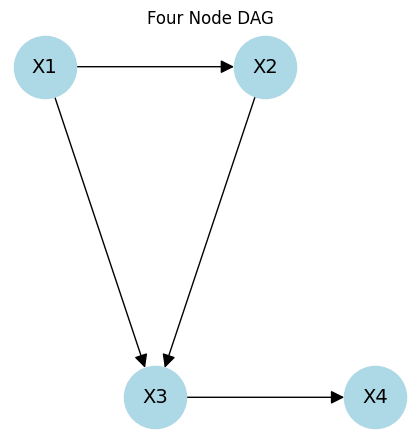

In [41]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed acyclic graph (DAG)
G = nx.DiGraph()

# Add edges based on the relationships in the provided figure
G.add_edges_from([('X1', 'X2'), ('X1', 'X3'), ('X3', 'X4'), ('X2', 'X3')])

# Define the layout to match the snapshot
pos = {'X1': (0, 2), 'X2': (2, 2), 'X3': (1, 1), 'X4': (3, 1)}

# Draw the DAG 
plt.figure(figsize=(4, 4))  # Reduced figure size for smaller display
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=14, arrowsize=20)
plt.title("Four Node DAG")
plt.show()



### Factorizing with Markov Properties

The local Markov assumption helps us simplify the factorization of joint distributions. If a distribution $P$ is Markov with respect to a DAG $\mathcal{G}$, we can factorize it accordingly. Consider the following factorization for a four-variable distribution:

$$
P(x_1, x_2, x_3, x_4) = P(x_1)P(x_2 \mid x_1)P(x_3 \mid x_2, x_1)P(x_4 \mid x_3, x_2, x_1)
$$

By applying the local Markov assumption to the DAG, where $X_4$ only depends on $X_3$, we can simplify the last factor:

$$
P(x_4 \mid x_3, x_2, x_1) = P(x_4 \mid x_3)
$$


Thus, the full factorization of the joint distribution becomes:

$$
P(x_1, x_2, x_3, x_4) = P(x_1)P(x_2 \mid x_1)P(x_3 \mid x_2, x_1)P(x_4 \mid x_3)
$$

This factorization shows how each variable's probability depends on others based on the DAG structure.


Depending on the graph structure, we may be able to simplify further. For instance, if the DAG has the structure $X_1 \to X_2 \to X_3 \to X_4$, then the factorization can be reduced to:

$$
P(x_1, x_2, x_3, x_4) = P(x_1)P(x_2 \mid x_1)P(x_3 \mid x_1)P(x_4 \mid x_3)
$$

### Parameter Reduction

For the example of four binary variables $X_1, X_2, X_3, X_4$, the table below shows the parameters needed to model the distribution $P(x_4 \mid x_3, x_2, x_1)$ when $n=4$ and all variables are binary:


| $x_1$ | $x_2$ | $x_3$ | $P(x_4 \mid x_3, x_2, x_1)$ |
|-------|-------|-------|----------------------------|
| 0     | 0     | 0     | $\alpha_1$                 |
| 0     | 0     | 1     | $\alpha_2$                 |
| 0     | 1     | 0     | $\alpha_3$                 |
| 0     | 1     | 1     | $\alpha_4$                 |
| 1     | 0     | 0     | $\alpha_5$                 |
| 1     | 0     | 1     | $\alpha_6$                 |
| 1     | 1     | 0     | $\alpha_7$                 |
| 1     | 1     | 1     | $\alpha_8$                 |

In this case, we need $2^{n-1} = 8$ parameters, $\alpha_1$ to $\alpha_8$. But we can reduce the complexity by modeling only local dependencies, such as $P(x_4 \mid x_3)$, to significantly lower the number of parameters required.

---

### Bayesian Network Factorization

The **Bayesian network factorization** follows directly from the local Markov assumption:

$$
P(x_1, \dots, x_n) = \prod_i P(x_i \mid \text{pa}_i)
$$

where $\text{pa}_i$ denotes the set of parents of $x_i$ in the DAG. This factorization, also known as the **chain rule for Bayesian networks**, guarantees that the joint distribution factorizes according to the structure of the DAG. If $P$ and the DAG $\mathcal{G}$ satisfy this factorization, then $P$ and $\mathcal{G}$ are said to be **Markov compatible**.

The **Minimality Assumption** strengthens the local Markov assumption by adding the condition that adjacent nodes in the DAG are dependent:

$\text{Minimality Assumption}$: 
1. Given its parents in the DAG $\mathcal{G}$, a node $X$ is independent of all its non-descendants.
2. Adjacent nodes in the DAG $\mathcal{G}$ are dependent.

---

## 3.4.2. Global Markov Property

The **Global Markov Property** states that any two sets of nodes in a DAG are conditionally independent if all paths between them are blocked by a set of nodes, according to the **d-separation** criterion. In mathematical terms, if $\mathbf{X}$, $\mathbf{Y}$, and $\mathbf{Z}$ are disjoint sets of variables in a DAG $\mathcal{G}$, then:

$$
\mathbf{X} \perp \mathbf{Y} \mid \mathbf{Z} \quad \text{if} \quad \mathbf{Z} \text{ d-separates } \mathbf{X} \text{ from } \mathbf{Y} \text{ in } \mathcal{G}.
$$

An slighly diffrent notation is:

$$
X \!\perp\!\!\!\perp_G Y |\{Z\} \Rightarrow X \!\perp\!\!\!\perp_P Y |\{Z\}
$$

* For all disjoint vertex sets $A,B,C$, the symbol $\!\perp\!\!\!\perp_{\mathcal{G}}$ denotes d-separation.
* Because of d-separation, we can read it $P$ is Markov with respect to $\mathcal{G}$ or $P$ satisfy Markov assumption in respect to $\mathcal{G}$.

This is the broadest form of the Markov property and encapsulates the relationship between any non-adjacent nodes in the graph. It provides a basis for deriving conditional independence relationships from the graph structure.


### Global Markov Example: a 3 Nodes DAG

Consider a simple chain structure $A \rightarrow B \rightarrow C$. 

Here, $A \perp C \mid B$, which means $A$ and $C$ are conditionally independent given $B$.


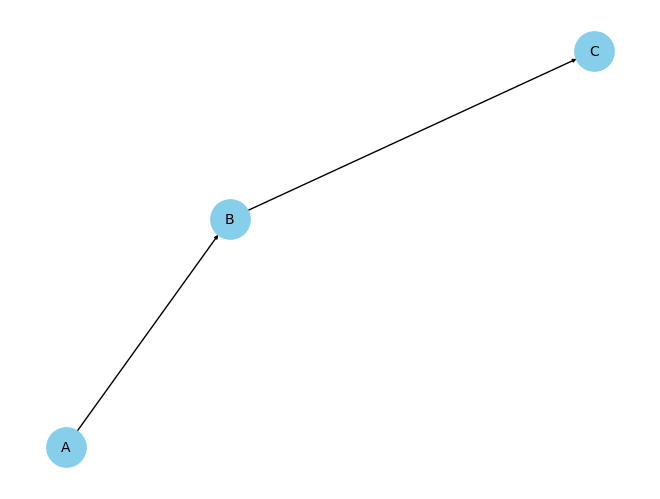

In [426]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a simple chain structure for illustration
G = nx.DiGraph()
G.add_edges_from([('A', 'B'), ('B', 'C')])

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=800, font_size=10, font_color='black', arrowsize=5)
plt.show()

---

## 3.4.3. Local Markov Property

The **Local Markov Property** refers to the fact that in a DAG, each node is conditionally independent of its non-descendants, given its parents. Mathematically, for a node $X_i$, the local Markov property can be expressed as:

$$
X_i \perp \text{NonDescendants}(X_i) \mid \text{Parents}(X_i)
$$

This means that once we know the values of the parents of a node, that node becomes independent of all non-descendant variables in the graph.


### Local Markov Example: a 4 Nodes Graph

Given its parents in the DAG, a node $X$ is independent of all its predecessors. For example, let consider the graph below.

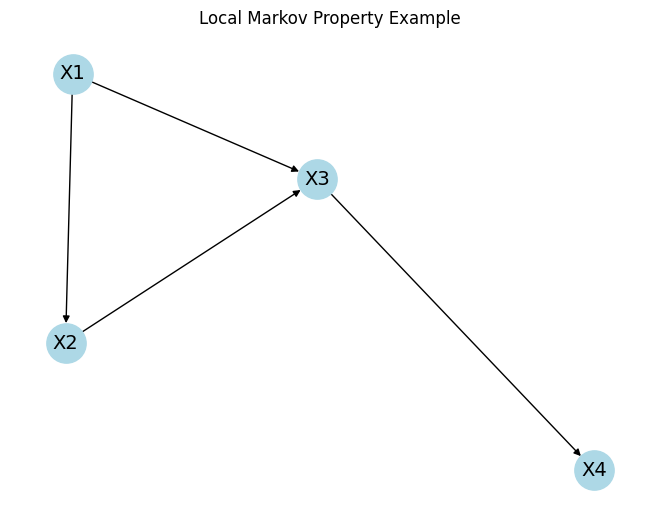

In [430]:
import networkx as nx
import matplotlib.pyplot as plt

# Define a directed graph (DAG) using NetworkX
G = nx.DiGraph()

# Add edges to represent the relationships in the graph
G.add_edges_from([
    ("X1", "X2"),
    ("X1", "X3"),
    ("X2", "X3"),
    ("X3", "X4")
])

# Use spring_layout for consistent layout style
pos = nx.spring_layout(G)

# Draw the graph with custom styling for consistency
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800, font_size=14, font_color='black', arrows=True, arrowstyle='-|>', arrowsize=10)
plt.title("Local Markov Property Example")
plt.show()


In the DAG above, we have:

$$
P(x_1, x_2, x_3, x_4) = P(x_1) P(x_2|x_1) P(x_3| x_2,x_1) P(x_4 | x_3, x_2, x_1)
$$

What happens with the *Local Markov Assumption*?

$$
P(x_1, x_2, x_3, x_4) = P(x_1) P(x_2|x_1) P(x_3| x_2,x_1) \underbrace{P(x_4 | x_3, x_2, x_1)}_{P(x_4 | x_3)}
$$

---

## 3.4.4. Pairwise Markov Property

The **Pairwise Markov Property** asserts that any two **non-adjacent** nodes in a graph are conditionally independent given all the other nodes in the graph. Specifically, if there is no direct edge between two nodes in a **Markov Random Field** (undirected graph), then the two nodes are conditionally independent, given the rest of the nodes in the graph.

The pairwise Markov property applies to **undirected graphs** (Markov Random Fields) and can be formally expressed as:

$$
X_i \perp X_j \mid \{ X_k : X_k \in V \setminus \{X_i, X_j\} \}
$$

Where:
- $X_i$ and $X_j$ are two non-adjacent nodes.
- $V$ is the set of all nodes in the graph.
- $\perp$ denotes conditional independence.

This differs from the **Local Markov Property**, which focuses on the conditional independence of a node given its parents or neighbors.


---

## 4. d-Separation in Graphs vs Conditional Independence in Distributions

d-Separation is a graphical concept that helps determine conditional independence relations in a DAG. When two variables are d-separated, they are conditionally independent given a set of other variables. The concept of d-separation directly corresponds to the **Markov properties** and provides a graphical interpretation of conditional independence.

Specifically, if two variables $X$ and $Y$ are d-separated by a set of variables $Z$ in a DAG, then $X$ and $Y$ are conditionally independent given $Z$ in the joint probability distribution that the DAG represents.

Formally, this can be written as:

$$
X \perp Y \mid Z \quad \text{if and only if} \quad Z \text{ d-separates } X \text{ from } Y \text{ in the DAG}.
$$

This criterion allows us to infer conditional independence purely from the graphical structure of a DAG without needing to calculate probabilities directly.


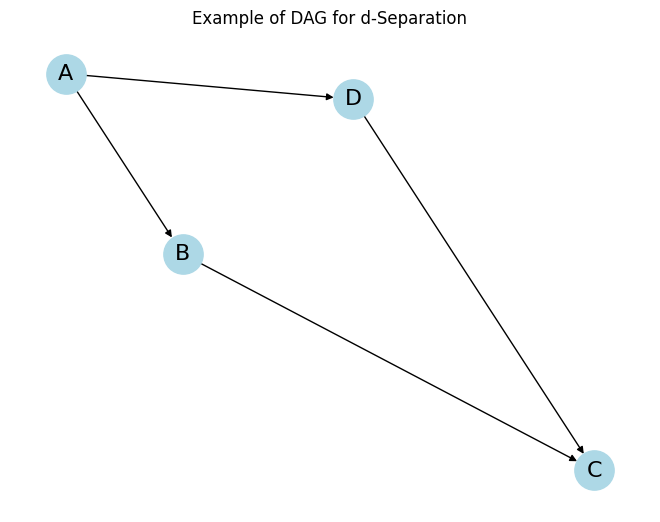

In [432]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a DAG
G = nx.DiGraph()
G.add_edges_from([('A', 'B'), ('B', 'C'), ('A', 'D'), ('D', 'C')])

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800, font_size=16, font_color='black', arrowsize=10)
plt.title("Example of DAG for d-Separation")
plt.show()


In this DAG, $A$ and $C$ are d-connected through both $B$ and $D$, meaning $A$ and $C$ are not conditionally independent unless we condition on both $B$ and $D$.

If we condition on both $B$ and $D$, then $A$ and $C$ become d-separated, and thus independent.


---

## 5. Markov Equivalence

Two Directed Acyclic Graphs (DAGs) are said to be **Markov Equivalent** if they encode the same set of conditional independence relations. This means that despite having different structures, the two DAGs represent the same conditional independencies among variables.

Markov Equivalent DAGs have:

1. **Same Skeleton**: 
   - The skeleton of a graph is the undirected graph obtained by ignoring the direction of the edges. Two DAGs are Markov equivalent if they have the same skeleton, meaning they have the same edges between nodes, regardless of direction.
   
2. **Same v-Structures**: 
   - A v-structure is a specific type of structure in a DAG where two variables, $A$ and $B$, both have directed edges pointing to a third variable $C$ (i.e., $A \rightarrow C \leftarrow B$). The condition is that there should be no direct edge between $A$ and $B$ in the skeleton. Markov Equivalent graphs must have the same set of v-structures.

3. **Conditional Independence Relations**:
   - Since Markov Equivalent DAGs encode the same set of conditional independence relationships, they cannot be distinguished based solely on observational data. In other words, both graphs will imply the same conditional independence relations for a given joint probability distribution.

### Why is Markov Equivalence Important?

Markov Equivalence tells us that it's often impossible to determine the unique direction of causality from observational data alone. If two or more DAGs are Markov Equivalent, additional assumptions or interventional data (through experiments) are needed to distinguish between them. This concept is critical in causal inference since identifying the exact causal structure can be challenging without experimental intervention.

### Example of Markov Equivalent DAGs



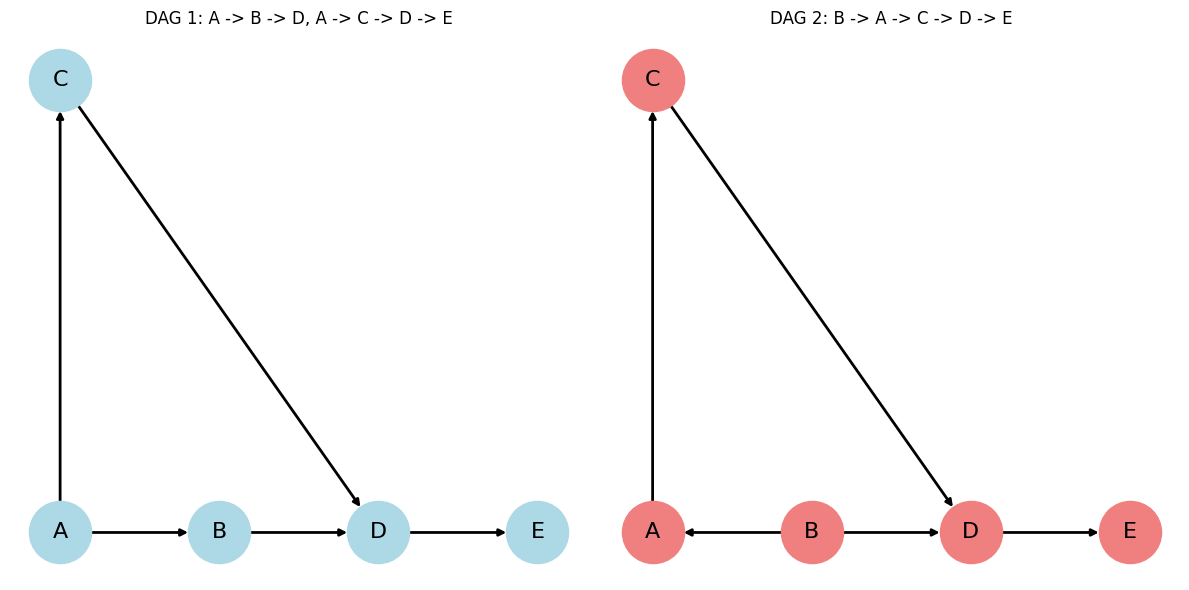

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the updated DAG 1 and DAG 2 as per the new structure
dag1_edges = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'D'), ('D', 'E')]
dag2_edges = [('B', 'A'), ('A', 'C'), ('B', 'D'), ('C', 'D'), ('D', 'E')]

# Create directed graphs for both DAGs
G1 = nx.DiGraph()
G2 = nx.DiGraph()

G1.add_edges_from(dag1_edges)
G2.add_edges_from(dag2_edges)

# Adjusted positions to make edges more uniform in length
pos = {
    'A': (0, 1),
    'B': (1, 1),
    'C': (0, 2),
    'D': (2, 1),
    'E': (3, 1)
}

# Draw the two DAGs for comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Set uniform edge width for all graphs
edge_width = 2

# Draw DAG 1
nx.draw(G1, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=16, 
        font_color='black', arrowsize=10, width=edge_width, ax=ax1)
ax1.set_title('DAG 1: A -> B -> D, A -> C -> D -> E')

# Draw DAG 2
nx.draw(G2, pos, with_labels=True, node_color='lightcoral', node_size=2000, font_size=16, 
        font_color='black', arrowsize=10, width=edge_width, ax=ax2)
ax2.set_title('DAG 2: B -> A -> C -> D -> E')

plt.tight_layout()
plt.show()



The two DAGs are **Markov Equivalent** because they encode the same set of conditional independence relationships, despite having different edge directions. Specifically:

1. **Same Skeleton**: 
   - The skeleton of a graph is the undirected version of the DAG, where edge directions are ignored. Both DAGs have the same skeleton, meaning the same undirected connections between nodes:
     - $ A - B $, $ A - C $, $ B - D $, $ C - D $, $ D - E $.

2. **Same v-Structures**: 
   - Both DAGs have the same v-structure $ B \rightarrow D \leftarrow C $, as well as no direct connection between $ B $ and $ C $. This ensures that both graphs represent the same conditional independence relationships between the variables.


## Test Markov Equivalent DAGs
To test whether the three graphs are Markov equivalent, we can write a second program that checks their skeletons (the undirected graph structure) and v-structures (collider structures). If both the skeletons and v-structures are the same, then the graphs are Markov equivalent.

DAG 1 and DAG 2 are Markov Equivalent: True
DAG 1 and DAG 3 are Markov Equivalent: False
DAG 2 and DAG 3 are Markov Equivalent: False


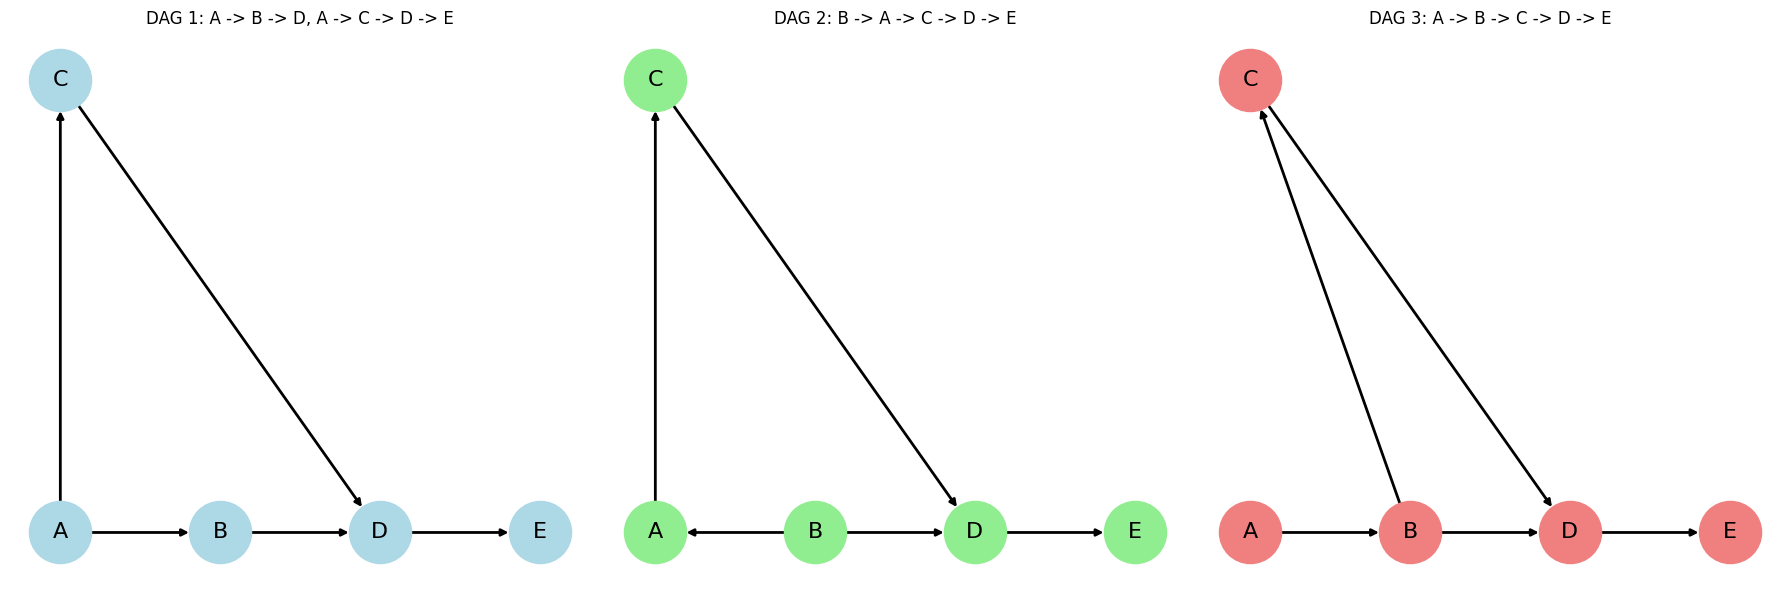

In [28]:
import networkx as nx
from networkx.algorithms import isomorphism
import matplotlib.pyplot as plt

# Define the DAGs
dag1_edges = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'D'), ('D', 'E')]
dag2_edges = [('B', 'A'), ('A', 'C'), ('B', 'D'), ('C', 'D'), ('D', 'E')]
dag3_edges = [('A', 'B'), ('B', 'C'), ('B', 'D'), ('C', 'D'), ('D', 'E')]

# Create directed graphs
G1 = nx.DiGraph(dag1_edges)
G2 = nx.DiGraph(dag2_edges)
G3 = nx.DiGraph(dag3_edges)

# Function to remove direction (skeleton) and check for v-structure similarity
def are_markov_equivalent(G1, G2):
    # Check if the skeletons (undirected versions) are the same
    skeleton_G1 = nx.Graph(G1)
    skeleton_G2 = nx.Graph(G2)
    
    if not isomorphism.GraphMatcher(skeleton_G1, skeleton_G2).is_isomorphic():
        return False

    # Check if v-structures are the same (v-structure: A -> C <- B)
    v_structures_G1 = set((u, v, w) for u, v in G1.edges() for w in G1.predecessors(v) if u != w and not G1.has_edge(u, w))
    v_structures_G2 = set((u, v, w) for u, v in G2.edges() for w in G2.predecessors(v) if u != w and not G2.has_edge(u, w))

    return v_structures_G1 == v_structures_G2

# Test Markov equivalence
print("DAG 1 and DAG 2 are Markov Equivalent:", are_markov_equivalent(G1, G2))
print("DAG 1 and DAG 3 are Markov Equivalent:", are_markov_equivalent(G1, G3))
print("DAG 2 and DAG 3 are Markov Equivalent:", are_markov_equivalent(G2, G3))

# Adjusted positions to make edges more uniform in length
pos = {
    'A': (0, 1),
    'B': (1, 1),
    'C': (0, 2),
    'D': (2, 1),
    'E': (3, 1)
}

# Draw the three DAGs for comparison
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Set uniform edge width for all graphs
edge_width = 2

# Draw DAG 1
nx.draw(G1, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=16, 
        font_color='black', arrowsize=10, width=edge_width, ax=ax1)
ax1.set_title('DAG 1: A -> B -> D, A -> C -> D -> E')

# Draw DAG 2
nx.draw(G2, pos, with_labels=True, node_color='lightgreen', node_size=2000, font_size=16, 
        font_color='black', arrowsize=10, width=edge_width, ax=ax2)
ax2.set_title('DAG 2: B -> A -> C -> D -> E')

# Draw DAG 3
nx.draw(G3, pos, with_labels=True, node_color='lightcoral', node_size=2000, font_size=16, 
        font_color='black', arrowsize=10, width=edge_width, ax=ax3)
ax3.set_title('DAG 3: A -> B -> C -> D -> E')

plt.tight_layout()
plt.show()


## 6. Markov Blanket

The **Markov Blanket** of a node is the minimal set of nodes that "shield" it from the rest of the network. Formally, the Markov blanket of a node $X_i$ in a DAG consists of:
- Its parents
- Its children
- The other parents of its children

<img src="img/ch3/emperor-penguins-family.png" alt="img" width="700"/>

Once you know the values of the nodes in the Markov blanket, $X_i$ is conditionally independent of all other nodes in the graph. The Markov blanket plays a key role in determining what information is necessary to predict a given node's behavior.

### Markov Blanket Example:

In this example, we define a DAG with five nodes and edges. The Markov blanket of node $B$ will be calculated, and the DAG will be visualized with the Markov blanket nodes highlighted.


Markov Blanket of B: {'C', 'D', 'A'}


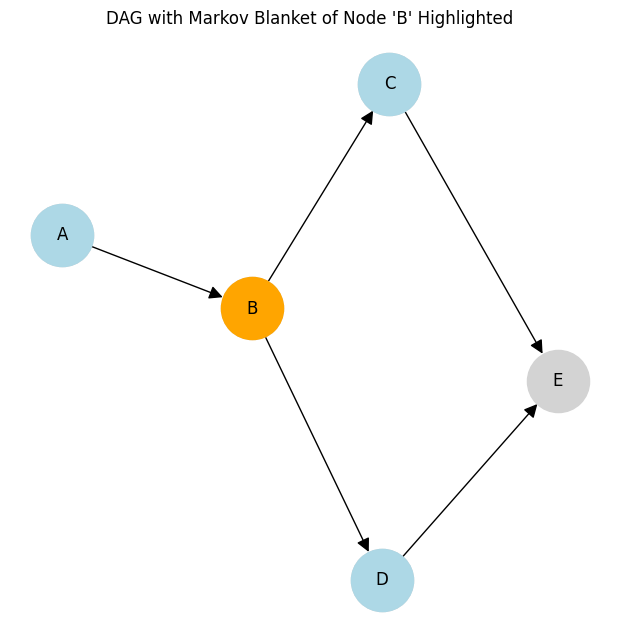

In [68]:
import networkx as nx
import matplotlib.pyplot as plt

# Define a DAG with edges
edges = [('A', 'B'), ('B', 'C'), ('B', 'D'), ('C', 'E'), ('D', 'E')]
G = nx.DiGraph(edges)

# Function to calculate the Markov blanket
def markov_blanket(graph, node):
    parents = set(graph.predecessors(node))
    children = set(graph.successors(node))
    co_parents = set()
    for child in children:
        co_parents.update(graph.predecessors(child))
    co_parents.discard(node)  # Remove the original node from co-parents
    return parents | children | co_parents

# Calculate the Markov blanket for node 'B'
markov_blanket_nodes = markov_blanket(G, 'B')
print(f'Markov Blanket of B: {markov_blanket_nodes}')

# Define positions for the nodes in the DAG for better visualization
pos = nx.spring_layout(G)

# Draw the entire DAG
plt.figure(figsize=(6, 6))
nx.draw(G, pos, with_labels=True, node_color='lightgray', node_size=2000, font_size=12, arrowsize=20)

# Highlight the Markov blanket nodes in a different color
nx.draw_networkx_nodes(G, pos, nodelist=markov_blanket_nodes, node_color='lightblue', node_size=2000)

# Highlight the target node 'B' in a distinct color
nx.draw_networkx_nodes(G, pos, nodelist=['B'], node_color='orange', node_size=2000)

plt.title("DAG with Markov Blanket of Node 'B' Highlighted")
plt.show()



---

## Example: A Simple DAG, with SCM, Factual Distributions, and Baysian Networks

This simple example summarizes what we learned from working with DAG, SCM probabilistic distribution, and the Bayesian network.

### Part 1: Creating the DAG

Here's the DAG representation and graph-based explanations:


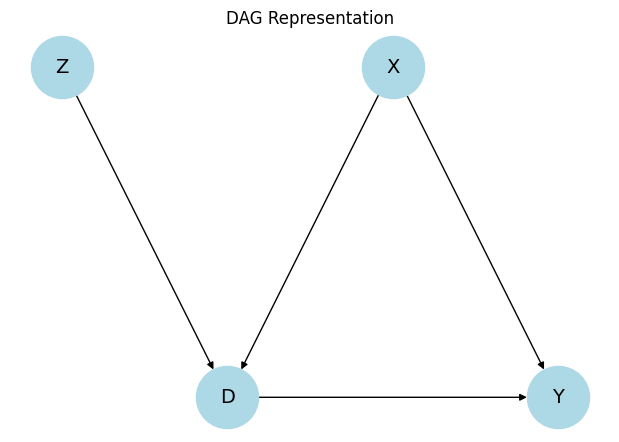

In [8]:
# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed acyclic graph (DAG)
G = nx.DiGraph()

# Add edges to represent the relationships Z -> D -> Y, X -> D, X -> Y
G.add_edges_from([('Z', 'D'), ('D', 'Y'), ('X', 'D'), ('X', 'Y')])

# Draw the DAG
plt.figure(figsize=(6, 4))
pos = {'Z': (0, 1), 'X': (2, 1), 'D': (1, 0), 'Y': (3, 0)}
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=14, arrowsize=10)
plt.title("DAG Representation")
plt.show()


#### DAG Explanations:

- $X \to D$, $X \to Y$: $X$ is a parent of both $D$ and $Y$.
- $Z \to D$: $Z$ is a parent of $D$, so $D$ is a descendant of $Z$.
- $D \to Y$: $D$ is a parent of $Y$.
- There is a **directed path** from $Z$ to $Y$ through $D$.
- $D$ is a **collider** on the path $Z \to D \leftarrow X$.
- There are no **cycles** (no directed paths that return to the same node).



### Part 2: Structural Causal Model (SCM)
The SCM defines how the variables interact based on the DAG structure. Each variable is expressed as a function of its parents and independent noise. In the next chapter, we will learn more about them.

From the DAG structure, we can write the following SCM:

- $Y := f_Y(D, X, U_Y)$
- $D := f_D(Z, X, U_D)$
- $X := U_X$
- $Z := U_Z$

Here, $U_Y, U_D, U_X, U_Z$ are exogenous noise terms that are mutually independent.

### Part 3: Factual Distributions

Using the Markov factorization property of DAGs, we can express the joint distribution over all variables in terms of their conditional dependencies.

We can factor the joint distribution $p(Y, D, X, Z)$ based on the DAG:

$$
p(y, d, x, z) = p(y \mid d, x) \cdot p(d \mid x, z) \cdot p(x) \cdot p(z)
$$

By applying **Bayes' Law**, we can also regroupe the terms of the factorization to highlight specific dependencies. 

$$
p(y, d, x, z) = p(y \mid d, x) \cdot p(d \mid x, z) \cdot p(x, z)
$$

- $p(y \mid d, x)$: The conditional distribution of $Y$, given $D$ and $X$, since $Y$ depends on both $D$ and $X$.
- $p(d \mid x, z)$: The conditional distribution of $D$, given $X$ and $Z$, since $D$ depends on both $X$ and $Z$.
- $p(x)$ and $p(z)$: The marginal distributions of $X$ and $Z$, respectively, since both are exogenous variables.


### Part 4: Partial Ordering

A **partial ordering** is a relation between the nodes in a directed acyclic graph (DAG) that defines the precedence or hierarchy of the nodes. In a DAG, **partial ordering** is a way of stating which nodes come before others, based on the direction of the edges. A strict partial order $\prec$ on a set of nodes $V$ satisfies two main properties:

1. **Transitivity**: If $A \prec B$ ($A$ precedes $B$) and $B \prec C$, then $A \prec C$.
2. **Irreflexivity**: No node precedes itself, i.e., $A \not\prec A$ for any $A$ in $V$.

In the context of a DAG, partial ordering is derived from the directed edges. For example, if there is a directed edge $X \to Y$, we say $X$ precedes $Y$ (denoted as $X \prec Y$). Partial ordering defines the relative order in which nodes must appear, based on the edges of the DAG.

#### Partial Ordering in the Current Example:

Given the vertices $V = \{Y, D, X, Z\}$ and the edge set $E$, the adjacency matrix for the graph is:

$$
E = \begin{pmatrix}
0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 \\
1 & 1 & 0 & 0 \\
0 & 1 & 0 & 0
\end{pmatrix}
$$

This matrix represents the following relationships:
- $X \to D$
- $X \to Y$
- $Z \to D$
- $D \to Y$

From this, we can derive the following partial ordering:

$$
X \prec D, \quad X \prec Y, \quad Z \prec D, \quad D \prec Y
$$

#### Explanation of the Partial Ordering:
- $X \prec D$: $X$ comes before $D$ because there is a directed edge from $X$ to $D$.
- $X \prec Y$: $X$ comes before $Y$ because there is a directed edge from $X$ to $Y$.
- $Z \prec D$: $Z$ comes before $D$ because there is a directed edge from $Z$ to $D$.
- $D \prec Y$: $D$ comes before $Y$ because there is a directed edge from $D$ to $Y$.


---

## Causal Assumptions

* Causal Directed Acyclic Graphs (DAGs) rely on several assumptions to make meaningful inferences about causal structures. 
* These assumptions limit the possible causal models and provide a framework for drawing conclusions based on observed data. 
* The goal is not to magically discover causal relationships but to understand what causality can be learned given these assumptions.

### Common Assumptions in Causal Discovery

1. **Acyclicity** — The causal structure is represented by a Directed Acyclic Graph (DAG) $\mathcal{G}$.

    * This assumption, known as the **Acyclicity assumption** or the **no-feedback assumption**, states that the causal relationships among variables can be depicted by a DAG, where no feedback loops or cycles exist.
    * It ensures that the causal relationships flow in a single direction, with no circular dependencies between variables.
    * Without this assumption, causal inference would become much more complicated, as feedback loops would imply that variables could influence themselves.

2. **Markov Property** — All variables are independent of their non-descendants when conditioned on their parents in the DAG.

    * This assumption is also known as the **Markov condition** or **local independence**.
    * It states that each variable is conditionally independent of its non-descendants given its parents (direct causes) in the DAG.
    * This assumption allows us to isolate causal effects and make predictions based on direct relationships, without being influenced by unrelated variables in the system.

3. **Faithfulness** — The DAG $\mathcal{G}$ captures all conditional independencies in the true underlying distribution $p$.

    * The **Faithfulness assumption** ensures that the causal model faithfully reflects the observed data.
    * This means that all conditional independencies found in the data should be represented in the DAG, and conversely, any statistical dependence should correspond to a causal relationship in the model.
    * In other words, if two variables are independent in the data, they must also be independent in the causal graph, and if two variables are dependent, the graph must reflect this relationship.

4. **Sufficiency** — There are no unobserved confounders between any pair of variables in $\mathcal{G}$.

    * This assumption implies that any pair of variables in the DAG is not influenced by an unobserved common cause.
    * **Sufficiency** ensures that the relationships between variables are not confounded by external factors that are not part of the model.
    * In practice, this assumption is often challenged because unobserved variables (confounders) are common in real-world data. However, it provides a starting point for causal analysis by assuming that all relevant confounders are either observed or adequately controlled for.

### Summary of Causal Assumptions:
- **Acyclicity**: No feedback loops or cycles; causality flows in one direction.
- **Markov Property**: Conditional independence of non-descendants, given parents.
- **Faithfulness**: The DAG must represent all observed conditional independencies.
- **Sufficiency**: No unobserved confounders; all relevant variables are included in the model.

These assumptions are the foundation for most causal discovery algorithms, helping to draw causal conclusions from data while acknowledging the limitations imposed by the assumptions themselves.


<br/>

In this lecture, we are more focus on Markovian assumption. However, there is a comprehensive discussion of these four causal assumptions in [Kalainathan et al., 2018]( https://arxiv.org/abs/1803.04929). 
Also check this nice paper, [An introduction to causal inference](https://www.cmu.edu/dietrich/philosophy/docs/scheines/introtocausalinference.pdf), by Richard Scheines, CMU.


## References

This chapter contents are inspired by following sources:

1. An **Open Access** Book by By Jonas Peters and others, 2017, The [Elements of Causal Inference (Open Access) book](https://mitpress.mit.edu/books/elements-causal-inference) .


2. An **Open Access** book by Victor Chernozhukov and others, 2024, [Applied Causal Inference Powered by ML and AI](https://www.causalml-book.org).

3. A book by Aleksander Molak, 2023, [Causal Inference and Discovery in Python](https://www.packtpub.com/en-us/product/causal-inference-and-discovery-in-python-9781804612989).

4. I also used a graph example from the [Introduction to Causal Inference](https://www.bradyneal.com/causal-inference-course) course by Brady Neal. He made a very nice **open-access** online course accompanied by videos on [YouTube](https://youtube.com/playlist?list=PLoazKTcS0Rzb6bb9L508cyJ1z-U9iWkA0).
